In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dataframe = pd.read_csv('../datasets/advertising.csv', header=None)

In [10]:
print (dataframe)

         0      1          2      3
0       TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3     12
4    151.5   41.3       58.5   16.5
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1     14
198    177    9.3        6.4   14.8
199  283.6     42       66.2   25.5
200  232.1    8.6        8.7   18.4

[201 rows x 4 columns]


In [11]:
X = dataframe.values[1:, 1]
y = dataframe.values[1:, 3]
print (X)
print (y)

['37.8' '39.3' '45.9' '41.3' '10.8' '48.9' '32.8' '19.6' '2.1' '2.6' '5.8'
 '24' '35.1' '7.6' '32.9' '47.7' '36.6' '39.6' '20.5' '23.9' '27.7' '5.1'
 '15.9' '16.9' '12.6' '3.5' '29.3' '16.7' '27.1' '16' '28.3' '17.4' '1.5'
 '20' '1.4' '4.1' '43.8' '49.4' '26.7' '37.7' '22.3' '33.4' '27.7' '8.4'
 '25.7' '22.5' '9.9' '41.5' '15.8' '11.7' '3.1' '9.6' '41.7' '46.2' '28.8'
 '49.4' '28.1' '19.2' '49.6' '29.5' '2' '42.7' '15.5' '29.6' '42.8' '9.3'
 '24.6' '14.5' '27.5' '43.9' '30.6' '14.3' '33' '5.7' '24.6' '43.7' '1.6'
 '28.5' '29.9' '7.7' '26.7' '4.1' '20.3' '44.5' '43' '18.4' '27.5' '40.6'
 '25.5' '47.8' '4.9' '1.5' '33.5' '36.5' '14' '31.6' '3.5' '21' '42.3'
 '41.7' '4.3' '36.3' '10.1' '17.2' '34.3' '46.4' '11' '0.3' '0.4' '26.9'
 '8.2' '38' '15.4' '20.6' '46.8' '35' '14.3' '0.8' '36.9' '16' '26.8'
 '21.7' '2.4' '34.6' '32.3' '11.8' '38.9' '0' '49' '12' '39.6' '2.9'
 '27.2' '33.5' '38.6' '47' '39' '28.9' '25.9' '43.9' '17' '35.4' '33.2'
 '5.7' '14.8' '1.9' '7.3' '49' '40.3' '25.8' '13.9' 

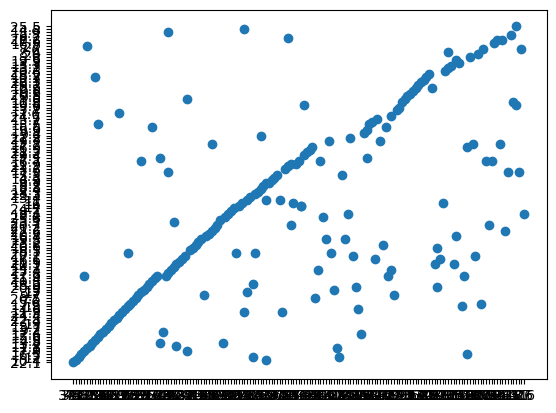

In [12]:
plt.scatter(X, y, marker='o')
plt.show()

In [27]:
# Function
def predict(new_radio, weight, bias):
  return weight*new_radio + bias

def cost_func(X, y, weight, bias):
  n = len(X)
  sum_error = 0
  for i in range(n):
    sum_error += (float(y[i]) - (weight*float(X[i]) + bias))**2
  return sum_error/n

def update_weight(X, y, weight, bias, learning_rate):
  n = len(X)
  weight_temp = 0.0
  bias_temp = 0.0
  for i in range(n):
    weight_temp += -2*float(X[i])*(float(y[i]) - (weight*float(y[i]) + bias))
    bias_temp += -2*(float(y[i]) - (weight*float(y[i]) + bias))
  
  # new weight
  weight -= (weight_temp/n)*learning_rate
  bias -= (bias_temp/n)*learning_rate

  return weight, bias

def training(X, y, weight, bias, learning_rate, iter):
  cost_history = []
  for i in range(iter):
    weight, bias = update_weight(X, y, weight, bias, learning_rate)
    cost = cost_func(X, y, weight, bias)
    # Neu sau moi lan training chi phi giam dan thi tot, chi phi kho giam dan thi co van de
    cost_history.append(cost)
  
  return weight, bias, cost_history

In [32]:
loop_number = 60
# Khoi tao ngau nhien (Thu sai thu sai, chon ngau nhien)
weight, bias, cost_history = training(X, y, 0.03, 0.0014, 0.001, loop_number)
print (weight)
print (bias)
print (cost_history)
print ('Gia tri du doan:')
print (predict(19, weight, bias))

0.9975668574233367
0.03966148137140346
[121.96034473531253, 217.5349913465556, 247.46602217484127, 255.04043423860824, 256.87833674983915, 257.32010502297646, 257.42614838464834, 257.45169028730254, 257.45794233625935, 257.4595728659157, 257.4600961872527, 257.4603542353115, 257.46054871290545, 257.4607279419505, 257.46090349891506, 257.46107815717295, 257.46125258114245, 257.4614269300015, 257.4616012418865, 257.4617755259363, 257.4619497843437, 257.4621240176359, 257.46229822594273, 257.4624724092974, 257.4626465677104, 257.46282070118804, 257.46299480973323, 257.4631688933505, 257.46334295204286, 257.46351698581356, 257.46369099466733, 257.4638649786065, 257.4640389376355, 257.4642128717571, 257.4643867809758, 257.4645606652946, 257.4647345247167, 257.46490835924635, 257.4650821688867, 257.4652559536415, 257.46542971351414, 257.46560344850826, 257.4657771586274, 257.4659508438752, 257.4661245042553, 257.4662981397708, 257.4664717504257, 257.4666453362234, 257.46681889716706, 257.466

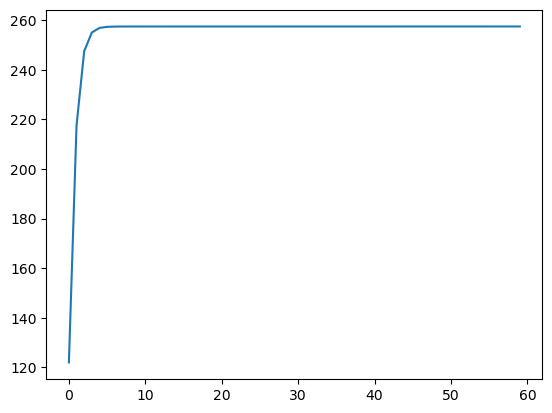

In [36]:
solanlap = [i for i in range(loop_number)]
plt.plot(solanlap, cost_history)
plt.show()